In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [7]:
RNA = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_Ncount.tsv', sep='\t').drop(columns='gene_name')
RNA.iloc[:,1:] = np.log2(RNA.iloc[:,1:])

display(RNA)

,gene_id,R0a,R0b,R0c,R4a,R4b,R4c,R8a,R8b,R8c
0,ENSMUSG00000033845,10.027599,10.242413,10.087243,12.356406,11.482956,12.277839,12.452062,12.788711,12.309352
1,ENSMUSG00000025903,10.242045,10.145042,10.172766,11.148180,10.296341,10.807487,11.542888,10.845891,10.853456
2,ENSMUSG00000033813,11.161548,10.967871,10.939163,10.383395,10.075881,10.138529,11.705629,11.036972,10.957540
3,ENSMUSG00000033793,11.111393,11.125081,11.249886,11.428176,11.261073,11.373321,11.240830,10.980122,11.134112
4,ENSMUSG00000025907,8.528688,7.674513,8.148636,8.402071,7.293916,8.265519,8.739371,8.398727,8.198510
...,...,...,...,...,...,...,...,...,...,...
12206,ENSMUSG00000064360,4.586127,2.923772,2.611292,5.579271,4.602127,5.046420,7.292365,6.694200,5.203536
12207,ENSMUSG00000064363,14.111886,13.721416,13.800650,16.264514,14.863249,15.538818,16.697738,15.810340,15.775099
12208,ENSMUSG00000064367,14.338414,14.007949,14.150396,15.512555,14.901742,15.945333,16.084498,15.787034,15.555057
12209,ENSMUSG00000064368,13.118392,13.024507,13.011108,14.887646,13.776857,14.920626,15.423547,15.134882,14.796233


In [13]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
AllMito = MitoCarta[['EnsemblGeneID']].drop_duplicates().rename(columns={'EnsemblGeneID':'gene_id'})

Genesets = {'All MitoCarta':AllMito,
            'All genes':RNA[['gene_id']]}

In [27]:
group_mem_n = 3
group_gap = 0.4
x_pos = [i*(group_mem_n+group_gap) + j for i,GS in enumerate(Genesets) for j in range(group_mem_n)]
box_colors = ['#FF6699','#DDDDDD']

plot_data = []
for GS in Genesets:
    tmp = pd.merge(Genesets[GS], RNA, on='gene_id')
    for day in ['0','4','8']:
        plot_data.append( tmp[[f'R{day}{rep}' for rep in ['a','b','c']]].mean(axis=1).to_list() )
        # plot_data.append( tmp[[f'R{day}{rep}' for rep in ['a','b','c']]].stack().to_list() )
box_color_list = [clr for clr in box_colors for i in range(group_mem_n)]

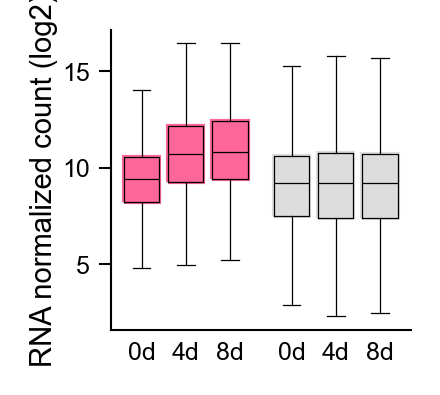

<Figure size 640x480 with 0 Axes>

In [28]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [1]*nrow
width_ratios = [0.5*len(Genesets)]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


ax = fig.add_subplot(grid[0,0])

box = ax.boxplot(plot_data, positions=x_pos, 
                 widths=0.8,
                 medianprops={'linewidth':0.3, 'color':'k'},
                 boxprops={'linewidth':0.3, 'color':'k'},
                 whiskerprops={'linewidth':0.3, 'color':'k'},
                 capprops={'linewidth':0.3, 'color':'k'},
                 showfliers=False,
                #  showmeans=True, meanprops={'marker':'D', 'markersize':'1.5', 'markerfacecolor':'k', 'markeredgewidth':0}
                 )
for artist, color in zip(box['boxes'], box_color_list):
    patch = mpl.patches.PathPatch(artist.get_path(), color=color)
    ax.add_artist(patch)
    

ax.set_xlim(x_pos[0]-0.7, x_pos[-1]+0.7)
ax.set_xticklabels(['0d','4d','8d']*len(Genesets))
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)

ax.set_xlabel('')
ax.set_ylabel('RNA normalized count (log2)', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig('mito_RNAlogNc_box.pdf', bbox_inches='tight')
plt.show()
plt.clf()